## **1. Data Acquitition**

In [1]:
# install library kaggle
!pip install -q kaggle

In [2]:
# upload kaggle.json yang sudah di download
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dinafanisafira","key":"0fdcc0be4f9aa2a4b8962bcedd655f3c"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download Dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:14<00:00, 224MB/s]
100% 2.29G/2.29G [00:14<00:00, 167MB/s]


In [5]:
# unzip dataset
!unzip chest-xray-pneumonia.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  in

In [6]:
# !rm -rf /content/data_split

# **2. Data Preparation**

In [7]:
# Memisahkan data training, testing, dan validasi
import os
import shutil
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

original_data_dir = '/content/chest_xray'
base_dir = '/content/data_split'

# Buat folder train/val/test
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Memisahkan data training, testing, dan validasi
import os
import shutil
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Dataset asli dari Kaggle memiliki struktur folder train/val/test di dalam /content/chest_xray
# Kita akan gabungkan dulu semuanya ke satu tempat agar bisa di-split ulang
source_base = '/content/chest_xray'
original_data_dir = '/content/all_data'  # folder sementara hasil gabungan
base_dir = '/content/data_split'         # folder hasil split ulang

# Siapkan folder gabungan sementara
os.makedirs(original_data_dir, exist_ok=True)

# Gabungkan data dari train, val, dan test menjadi satu folder per kelas
for folder in ['train', 'val', 'test']:
    folder_path = os.path.join(source_base, folder)
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue
        merged_class_path = os.path.join(original_data_dir, class_name)
        os.makedirs(merged_class_path, exist_ok=True)
        for img in os.listdir(class_path):
            if img.lower().endswith(('.png', '.jpg', '.jpeg')) and '_mask' not in img.lower():
                src = os.path.join(class_path, img)
                dst = os.path.join(merged_class_path, img)
                shutil.copy(src, dst)

# Buat folder train/val/test hasil split ulang
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Iterasi per kelas
for class_name in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Ambil hanya file gambar, abaikan file _mask
    images = [img for img in os.listdir(class_path)
              if img.lower().endswith(('.png', '.jpg', '.jpeg')) and '_mask' not in img.lower()]

    # Split data: 70% train, 15% val, 15% test
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    # Salin ke direktori baru
    for img_set, folder in zip([train_imgs, val_imgs, test_imgs], [train_dir, val_dir, test_dir]):
        class_folder = os.path.join(folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for img in img_set:
            src = os.path.join(class_path, img)
            dst = os.path.join(class_folder, img)
            shutil.copy(src, dst)

print("✅ Data splitting selesai dari dataset Kaggle dan _mask diabaikan.")



✅ Data splitting selesai dari dataset Kaggle dan _mask diabaikan.


In [8]:
# Menampilkan jumlah data pada setiap pembagian data
from collections import defaultdict
import os

def count_images_per_class(data_dir):
    class_counts = defaultdict(int)
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            # Hanya hitung file gambar
            num_images = len([img for img in os.listdir(class_path)
                              if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[class_name] = num_images
    return class_counts

# Lokasi direktori split
base_dir = 'data_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Tampilkan jumlah data per kelas
print("📊 Jumlah data per kelas:")

print("\n[TRAIN]")
train_counts = count_images_per_class(train_dir)
for k, v in train_counts.items():
    print(f"{k}: {v} gambar")

print("\n[VALIDASI]")
val_counts = count_images_per_class(val_dir)
for k, v in val_counts.items():
    print(f"{k}: {v} gambar")

print("\n[TESTING]")
test_counts = count_images_per_class(test_dir)
for k, v in test_counts.items():
    print(f"{k}: {v} gambar")


📊 Jumlah data per kelas:

[TRAIN]
PNEUMONIA: 2991 gambar
NORMAL: 1108 gambar

[VALIDASI]
PNEUMONIA: 641 gambar
NORMAL: 237 gambar

[TESTING]
PNEUMONIA: 641 gambar
NORMAL: 238 gambar


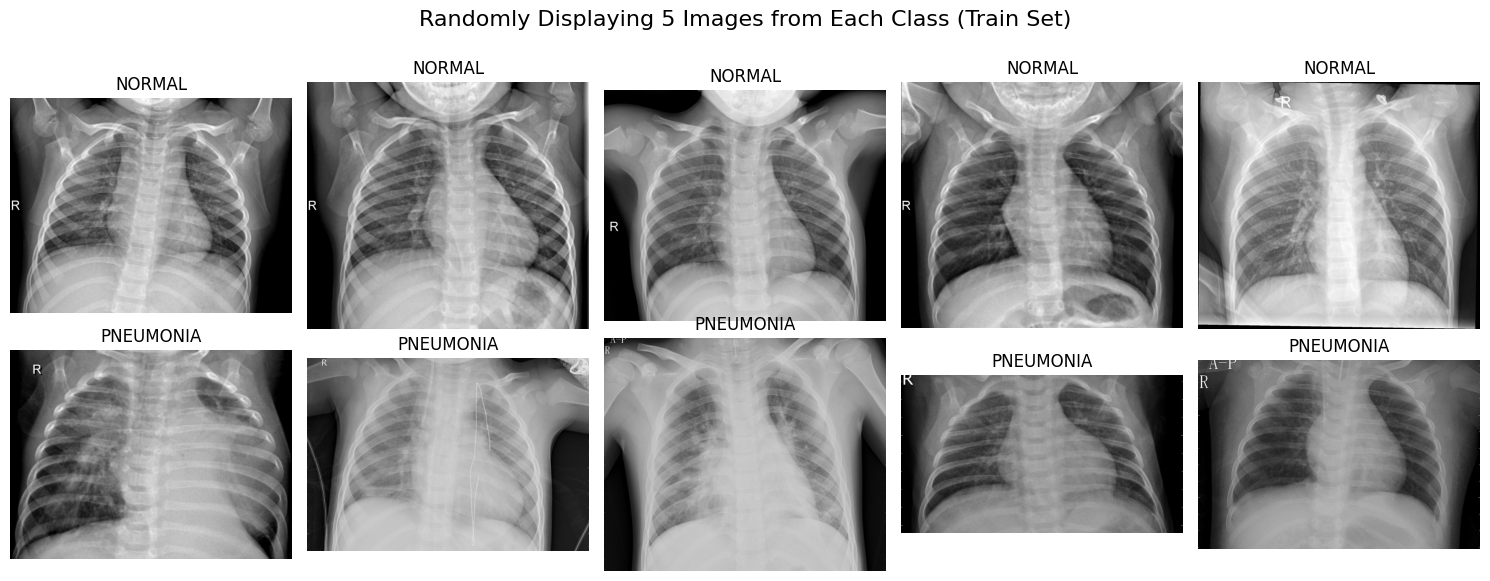

In [9]:
import os
import random
import matplotlib.pyplot as plt

# Direktori utama data gambar hasil split
data_dir = '/content/data_split/train'

# List nama kelas
class_names = sorted(os.listdir(data_dir))

# Membuat subplot (1 baris per kelas, 5 gambar per kelas)
fig, axes = plt.subplots(len(class_names), 5, figsize=(15, 3 * len(class_names)))
fig.suptitle("Randomly Displaying 5 Images from Each Class (Train Set)", fontsize=16)

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    class_images = [img for img in os.listdir(class_dir)
                    if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Pastikan hanya pilih maksimal 5 gambar (jaga-jaga kalau ada kelas yang sedikit)
    selected_images = random.sample(class_images, min(5, len(class_images)))

    for j in range(5):
        ax = axes[i, j] if len(class_names) > 1 else axes[j]  # Handle jika hanya 1 kelas

        if j < len(selected_images):
            image_path = os.path.join(class_dir, selected_images[j])
            img = plt.imread(image_path)
            ax.imshow(img, cmap='gray')
            ax.set_title(class_name)
        ax.axis('off')  # Nonaktifkan axis

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Supaya tidak tabrakan dengan judul
plt.show()


# **3. Data Augmentation**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4099 images belonging to 2 classes.
Found 878 images belonging to 2 classes.
Found 879 images belonging to 2 classes.


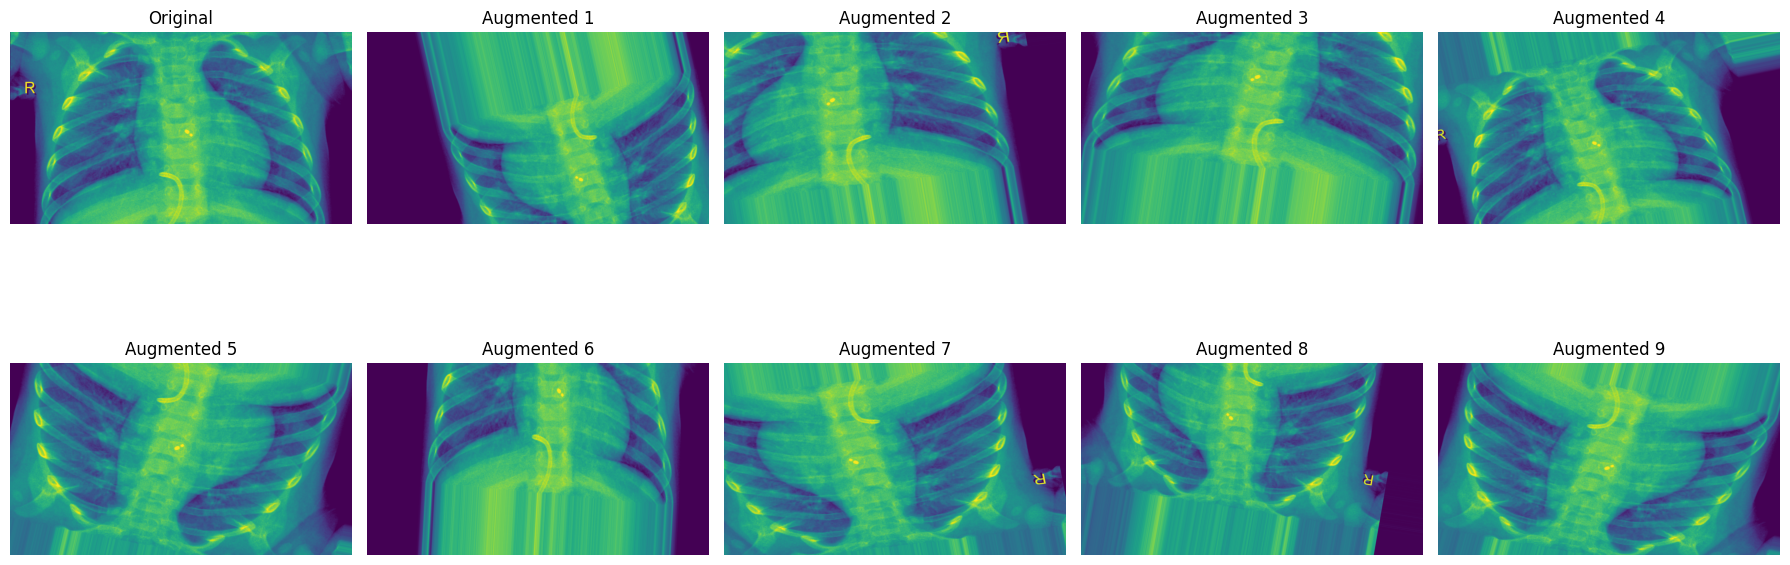

In [12]:
# Visualisasi hasil augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
# import random

# Direktori data training
data_dir = train_dir

# List nama kelas yang tersedia di direktori training
class_names = os.listdir(data_dir)
class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]

if not class_names:
    print("❌ Tidak ada direktori kelas ditemukan di", train_dir)
else:
    # Memilih satu kelas secara acak
    selected_class = random.choice(class_names)

    # Mendapatkan daftar gambar dari kelas yang dipilih
    class_dir = os.path.join(data_dir, selected_class)
    class_images = os.listdir(class_dir)
    class_images = [img for img in class_images] # Memastikan hanya file gambar

    if not class_images:
        print(f"❌ Tidak ada gambar ditemukan di direktori kelas: {selected_class}")
    else:
        # Memilih secara acak satu gambar dari kelas yang dipilih
        selected_image = random.choice(class_images)

        # Memuat gambar dan mengonversi menjadi larik numpy
        img_path = os.path.join(class_dir, selected_image)
        try:
            img = plt.imread(img_path)
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Mengubah dimensi menjadi (1, height, width, channels)

            # Menghasilkan augmented images
            augmented_images = []
            for batch in train_datagen.flow(img_array, batch_size=1):
                augmented_images.append(array_to_img(batch[0]))
                if len(augmented_images) >= 9:  # Menampilkan 9 variasi augmentasi
                    break

            # Tampilkan dalam grid 2x5
            plt.figure(figsize=(18, 8))
            # Gambar asli
            plt.subplot(2, 5, 1)
            plt.imshow(img)
            plt.title("Original", fontsize=12)
            plt.axis('off')

            # Gambar hasil augmentasi
            for i, augmented_img in enumerate(augmented_images):
                plt.subplot(2, 5, i+2)
                plt.imshow(augmented_img)
                plt.title(f"Augmented {i+1}", fontsize=12)
                plt.axis('off')

            plt.tight_layout()
            plt.show()

        except FileNotFoundError:
            print(f"❌ File tidak ditemukan: {img_path}")
        except Exception as e:
            print(f"❌ Terjadi kesalahan saat memproses gambar: {e}")

# **4. Pemodelan**

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2

# Membuat model dasar ResNet50V2 (pre-trained) tanpa lapisan klasifikasi teratas
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Menetapkan lapisan-lapisan dalam model dasar sebagai non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Membangun model Anda dengan menambahkan lapisan-lapisan klasifikasi kustom
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')  # ✅ jumlah kelas = 2
])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# mendefinisikan callback Early Stopping dan Model Chekpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  Early Stopping akan menghentikan pelatihan lebih awal jika kriteria tertentu tidak terpenuhi
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",         # Mengindikasikan metrik yang akan diamati selama pelatihan model
    min_delta=0.001,            # Nilai minimum perubahan yang harus terjadi dalam metrik yang diamati agar pelatihan tetap berlanjut
    patience=5,                 # Berapa banyak epoch yang harus berlalu tanpa ada peningkatan sebelum pelatihan dihentikan
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=True   # Model akan dikembalikan ke bobot terbaik yang telah dicapai selama pelatihan sebelum dihentikan
)

# Model Chekpoint akan menyimpan bobot terbaik selama pelatihan
checkpoint_path = 'model_checkpoints/best_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',         # metrik yang akan diamati saat menyimpan bobot
    mode='min',
    save_best_only=True,        # menyimpan bobot model terbaik berdasarkan metrik yang diamati
    save_weights_only=True,
    verbose=1
)

In [15]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), #1e-4
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,614,914 (93.90 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [16]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.8196 - loss: 0.3846
Epoch 1: val_loss improved from inf to 0.20776, saving model to model_checkpoints/best_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 115s 777ms/step - accuracy: 0.8199 - loss: 0.3840 - val_accuracy: 0.9271 - val_loss: 0.2078
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.9076 - loss: 0.2273
Epoch 2: val_loss improved from 0.20776 to 0.20275, saving model to model_checkpoints/best_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 681ms/step - accuracy: 0.9076 - loss: 0.2272 - val_accuracy: 0.9214 - val_loss: 0.2027
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9254 - loss: 0.1946
Epoch 3: val_loss did not improve from 0.20275
129/129 ━━━━━━━━━━━━━━━━━━━━ 141s 673ms/step - accuracy: 0.9254 - loss: 0.1946 - val_accuracy: 0.9112 - val_loss: 0.2197
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9249 - loss: 0.1959
Epoch 4: val_loss improved 

# **5. Evaluasi**

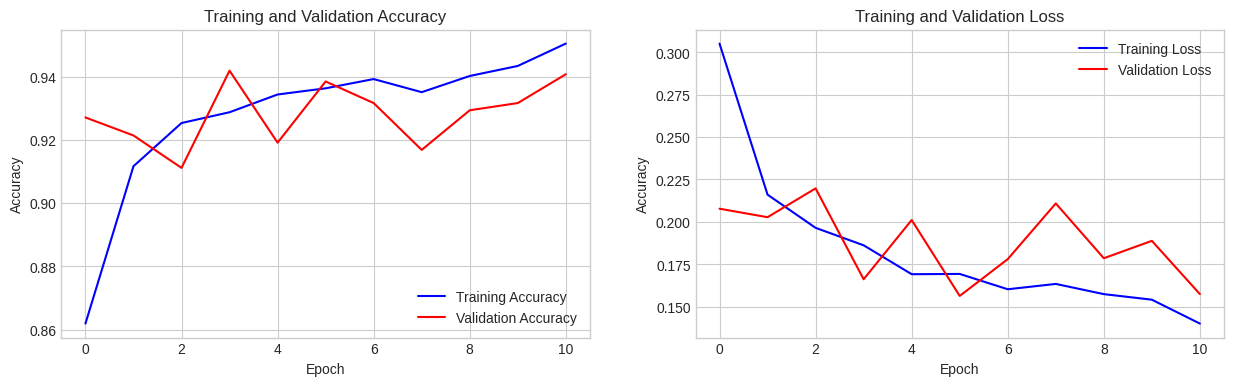

In [17]:
# plotting hasil training
plt.style.use('seaborn-v0_8-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'b')
  val_acc_plot, = plt.plot(epochs, val_acc, 'r')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'b')
  val_loss_plot, = plt.plot(epochs, val_loss, 'r')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,4))
  plot_acc(history)
  plot_loss(history)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

plot_history(history)

In [18]:
# Setelah load bobot terbaik
model.load_weights('model_checkpoints/best_model.weights.h5')

In [26]:
import tensorflow as tf

# Pastikan model sudah dimuat dan bobot terbaik sudah diload
model.load_weights('model_checkpoints/best_model.weights.h5')

# Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optional: quantization
tflite_model = converter.convert()

# Simpan hasilnya
with open('model_cnn.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpljg0tmlo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_190')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136241359246096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359249552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359249936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359248592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359248400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359246864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359250704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359252432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359251472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136241359252240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1362413592

In [27]:
class_names = ['Normal', 'Pneumonia']
import json
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

In [28]:
# Evaluasi Model
import pandas as pd

train_result = model.evaluate(train_generator)
val_result = model.evaluate(val_generator)
test_result = model.evaluate(test_generator)

model_result = pd.DataFrame(zip(train_result, val_result, test_result),
                             columns=['Train', 'Validation', 'Testing'],
                             index=['Loss', "Accuracy"])

model_result

129/129 ━━━━━━━━━━━━━━━━━━━━ 79s 615ms/step - accuracy: 0.9396 - loss: 0.1647
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.9414 - loss: 0.1477
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - accuracy: 0.9483 - loss: 0.1706


,Train,Validation,Testing
Loss,0.168483,0.156336,0.125440
Accuracy,0.936814,0.938497,0.956769


In [29]:
# Menampilkan classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Ambil prediksi dari model_resnet
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label asli
y_true = test_generator.classes

# Label mapping (index ke nama kelas)
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.91      0.94      0.92       238
   PNEUMONIA       0.98      0.96      0.97       641

    accuracy                           0.96       879
   macro avg       0.94      0.95      0.95       879
weighted avg       0.96      0.96      0.96       879



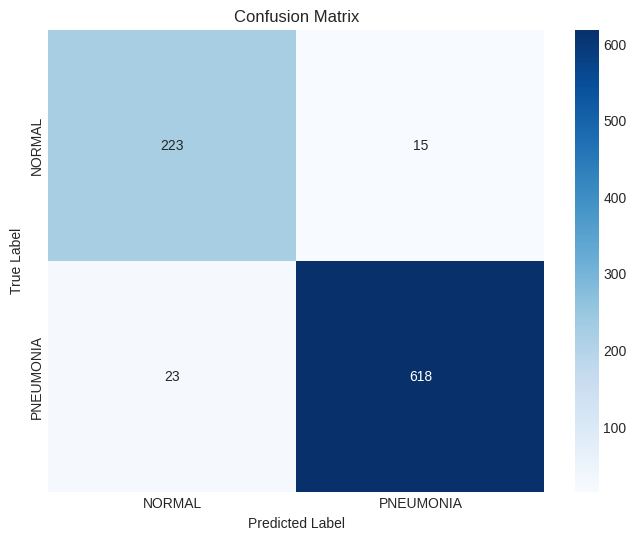

In [30]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

✅ Nama kelas berhasil diambil dari train_generator: ['NORMAL', 'PNEUMONIA']


Saving person100_bacteria_477.jpeg.jpg to person100_bacteria_477.jpeg.jpg
Gambar 'person100_bacteria_477.jpeg.jpg' berhasil diunggah.


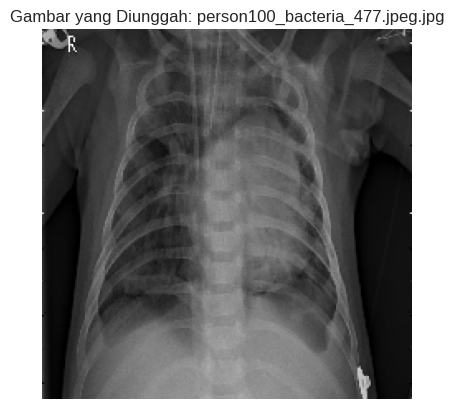

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

=== Hasil Prediksi ===
File Gambar: person100_bacteria_477.jpeg.jpg
Kelas Prediksi: PNEUMONIA

Probabilitas Setiap Kelas:
      Images  Probability
0     NORMAL      0.01595
1  PNEUMONIA      0.98405


In [31]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import io
from google.colab import files

# Asumsikan model sudah dimuat/didefinisikan

# fungsi untuk mengklasifikasi gambar (sama seperti sebelumnya)
def predict_image(image_upload, model=None, class_names=None):
    if model is None:
        print("Error: Model belum didefinisikan.")
        return None, None
    if class_names is None:
        print("Error: Nama kelas belum didefinisikan.")
        return None, None

    im = image_upload
    im_array = np.asarray(im)
    im_array = im_array * (1 / 255.0)
    im_input = tf.reshape(im_array, shape=[1, 224, 224, 3])

    predict_array = model.predict(im_input)[0]

    df_predict = pd.DataFrame(predict_array, columns=['Probability'])
    df_predict['Images'] = class_names
    df_predict = df_predict[['Images', 'Probability']]

    predicted_label_index = np.argmax(predict_array)
    predicted_product = class_names[predicted_label_index]

    return predicted_product, df_predict

# Asumsikan model sudah dimuat
try:
    if 'model' not in locals() or model is None:
        model = tf.keras.models.load_model('model_checkpoints/best_model.weights.h5')
        print("✅ Model berhasil dimuat.")
except Exception as e:
    print(f"❌ Gagal memuat model: {e}")
    model = None

# Ambil nama kelas dari train_generator
try:
    if 'train_generator' in locals() and train_generator is not None:
        class_names_from_generator = list(train_generator.class_indices.keys())
        print("✅ Nama kelas berhasil diambil dari train_generator:", class_names_from_generator)

        uploaded = files.upload()

        if uploaded:
            for filename in uploaded.keys():
                print(f"Gambar '{filename}' berhasil diunggah.")

                # Memuat gambar yang diunggah
                uploaded_image = uploaded[filename]
                img = load_img(io.BytesIO(uploaded_image), target_size=(224, 224))
                img_array = img_to_array(img)
                plt.imshow(img)
                plt.title(f"Gambar yang Diunggah: {filename}")
                plt.axis('off')
                plt.show()

                if model is not None:
                    predicted_class, probability_df = predict_image(img_array, model=model, class_names=class_names_from_generator)
                    print("\n=== Hasil Prediksi ===")
                    print("File Gambar:", filename)
                    print("Kelas Prediksi:", predicted_class)
                    print("\nProbabilitas Setiap Kelas:")
                    print(probability_df)
                else:
                    print("\n⚠️ Tidak dapat melakukan prediksi karena model belum dimuat.")
        else:
            print("Tidak ada file yang diunggah.")

    else:
        print("❌ train_generator belum didefinisikan, tidak dapat mengambil nama kelas.")

except NameError:
    print("❌ Variabel train_generator tidak ditemukan.")
except ImportError:
    print("❌ Modul 'google.colab' tidak ditemukan. Pastikan Anda menjalankan kode di Google Colab.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

In [33]:
from google.colab import files
files.download('model_cnn.tflite')
files.download('class_names.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import zipfile

with zipfile.ZipFile('model_cnn_clean.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('model.h5')

from google.colab import files
files.download('model_cnn_clean.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>